In [358]:
#Importing libraries and source datas

In [359]:
# import 'pandas' data analysis library
import pandas as pd

# import 'matplotlib' library's 'pyplot' interface for creating charts/plots
import matplotlib.pyplot as plt

# import chart style sheets
from matplotlib import style
# which style sheet to use
style.use('ggplot')

# import 'seaborn' data visualization library
import seaborn as sns

# import Windows sound playing module
import winsound

# import 'skew' and 'kurtosis' from 'scipy' library's 'stats' module
from scipy.stats import skew, kurtosis

# import Shapiro-Wilk (S-W) normality test
from scipy.stats import shapiro

# import function for coloring output
from termcolor import colored

# import probability Q-Q plot
from scipy.stats import probplot

# import Levene's test - testing the difference in the Variances of groups
from scipy.stats import levene

# import Student's t-test (2 independent samples) 
from scipy.stats import ttest_ind

# import Analysis of Variance (ANOVA) - One-way
from scipy.stats import f_oneway



In [360]:
inputfolderpath = r'C:\Users\dunca_n0wxpzg\Documents\Adatelemzés\Statisztika alap\telco_churn (1)'
inputfile = 'churn_data.csv'

In [361]:
# read data from csv file into a dataframe
df = pd.read_csv(inputfolderpath + '\\' + inputfile, sep = ',', encoding = 'utf-8')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [362]:
#Data preparation

In [363]:
# show data types of all columns
print(df.dtypes)

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [364]:
# show descriptive statistics of all numerical columns
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


<Figure size 640x480 with 0 Axes>

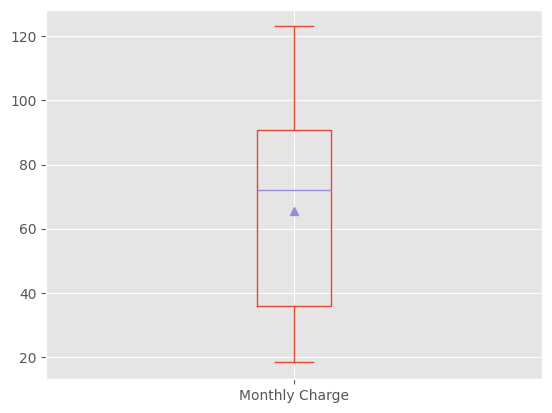

In [365]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'Monthly Charge', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

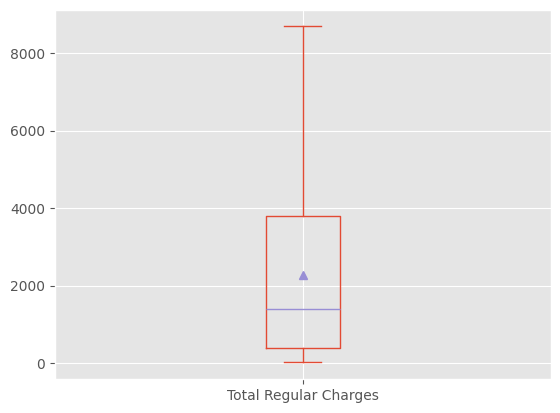

In [366]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'Total Regular Charges', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

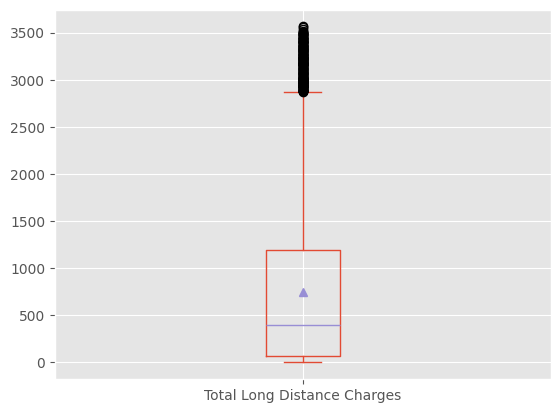

In [367]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'Total Long Distance Charges', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

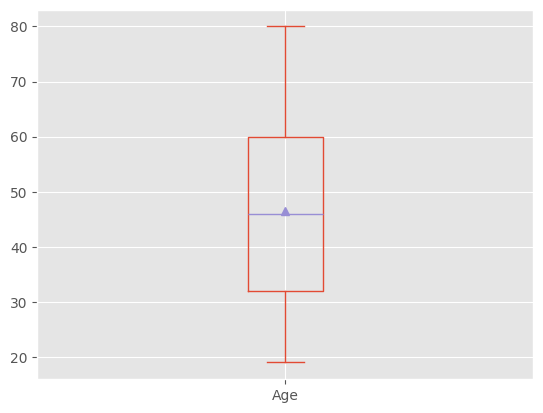

In [368]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'Age', showmeans = True)
plt.show()

<Figure size 640x480 with 0 Axes>

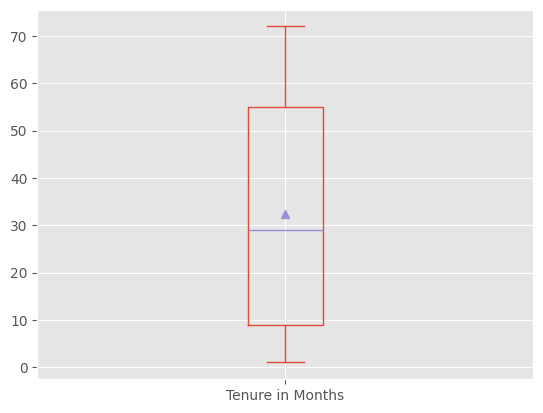

In [369]:
# box plot: chart showing the descriptive statistics values
plt.figure()
df.plot.box(column = 'Tenure in Months', showmeans = True)
plt.show()

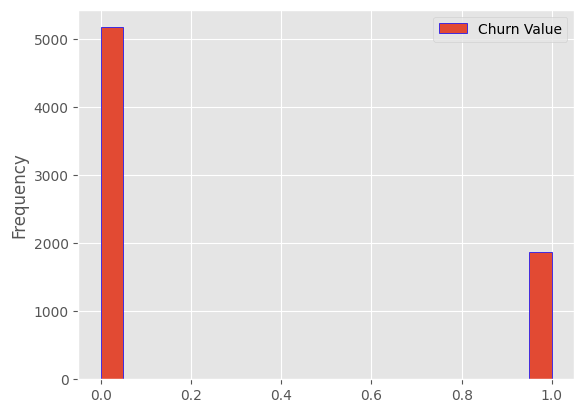

In [370]:
# histogram: frequency of data (with Pandas)
plt.figure()
df['Churn Value'].plot.hist(bins = 20, edgecolor = 'blue', legend = True)
plt.show()

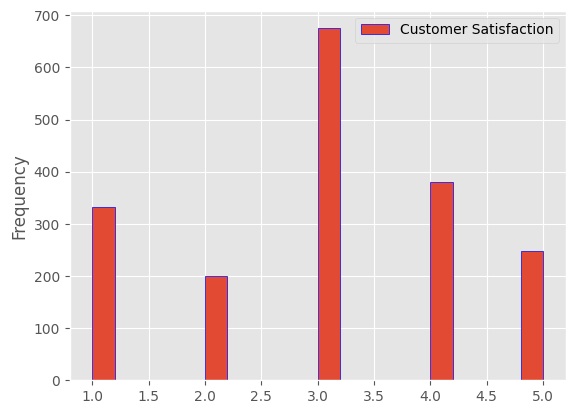

In [371]:
# histogram: frequency of data (with Pandas)
plt.figure()
df['Customer Satisfaction'].plot.hist(bins = 20, edgecolor = 'blue', legend = True)
plt.show()

In [372]:
# create a pivot table
pivot_count_churncat_ID = pd.pivot_table(df, values = ['Customer ID'], index = ['Churn Category'], 
    aggfunc = 'count', fill_value = 0)
pivot_count_churncat_ID

,Customer ID
Churn Category,
Attitude,314
Competitor,841
Dissatisfaction,303
Other,200
Price,211


In [373]:
# create a pivot table
pivot_count_churnreason_ID = pd.pivot_table(df, values = ['Customer ID'], index = ['Churn Reason'], 
    aggfunc = 'count', fill_value = 0)
pivot_count_churnreason_ID

,Customer ID
Churn Reason,
Attitude of service provider,94
Attitude of support person,220
Competitor had better devices,313
Competitor made better offer,311
Competitor offered higher download speeds,100
Competitor offered more data,117
Deceased,6
Don't know,130
Extra data charges,39


In [374]:
# correlation matrix (how strongly are variables related to each other)
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
Number of Referrals,1.000000,0.326975,0.006336,0.024131,0.016020,0.250378,0.024756,0.086958,0.216190,-0.025141,0.278003,0.001463,0.018715,-0.009893,-0.007704,-0.286540,0.122843,-0.140121,-0.112472,0.263029
Tenure in Months,0.326975,1.000000,0.014596,0.031410,0.231389,0.826074,0.059021,0.330911,0.674149,0.009927,0.108237,0.007146,0.011963,-0.009672,-0.012102,-0.352861,0.396292,-0.200989,-0.155561,0.306166
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.029658,0.138439,0.069500,-0.018644,0.028602,0.599828,-0.011749,-0.007324,0.005894,0.002631,-0.004341,-0.018665,0.008120,0.023858,0.016678,-0.001392,0.002773
Avg Monthly GB Download,0.024131,0.031410,-0.029658,1.000000,0.392364,0.208882,0.001431,0.404215,0.000372,-0.373632,0.117269,-0.012029,-0.029457,0.032105,0.027487,0.094932,0.016595,0.064806,0.048205,-0.092567
Monthly Charge,0.016020,0.231389,0.138439,0.392364,1.000000,0.636000,0.032154,0.319583,0.235441,0.148281,-0.139753,-0.011074,-0.031429,0.028829,0.011412,0.232339,0.092075,0.119970,0.103774,-0.244160
Total Regular Charges,0.250378,0.826074,0.069500,0.208882,0.636000,1.000000,0.039558,0.441563,0.610185,0.059684,0.022535,0.001978,-0.002784,0.003811,-0.006434,-0.198546,0.341947,-0.118745,-0.087749,0.153739
Total Refunds,0.024756,0.059021,-0.018644,0.001431,0.032154,0.039558,1.000000,0.024248,0.028113,0.024168,0.014023,-0.003797,-0.009901,-0.000597,0.019627,-0.033709,0.007992,-0.010620,-0.012822,0.035606
Total Extra Data Charges,0.086958,0.330911,0.028602,0.404215,0.319583,0.441563,0.024248,1.000000,0.244896,-0.140663,0.077710,0.002506,-0.008546,0.005964,0.018185,0.006227,0.127702,0.014048,-0.000883,0.006571
Total Long Distance Charges,0.216190,0.674149,0.599828,0.000372,0.235441,0.610185,0.028113,0.244896,1.000000,0.003065,0.068966,0.005063,0.008029,-0.006923,-0.018640,-0.223756,0.282189,-0.120352,-0.097072,0.208038
Age,-0.025141,0.009927,-0.011749,-0.373632,0.148281,0.059684,0.024168,-0.140663,0.003065,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.018881,0.115760,-0.001826,0.063407,0.042983,-0.119243


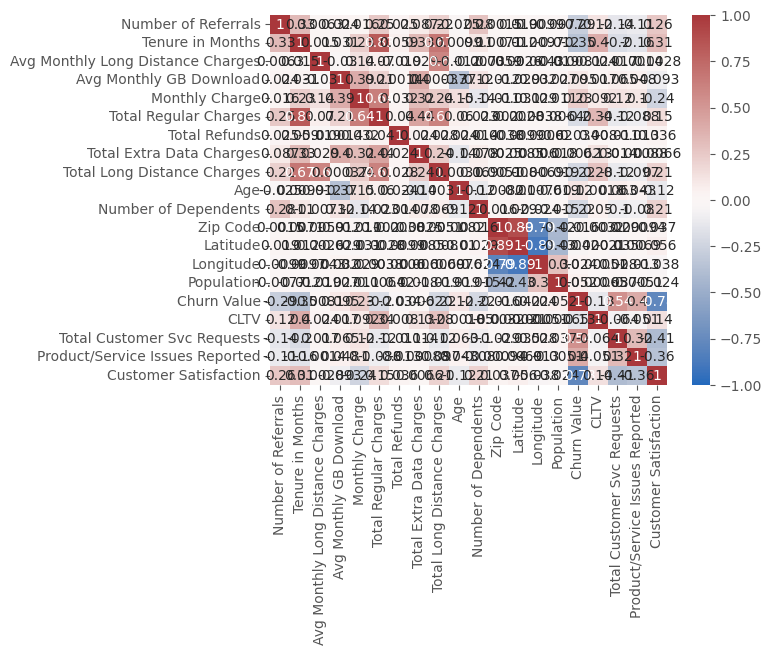

In [375]:
# visualize correlations in a heatmap matrix
plt.figure()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = +1, cmap ="vlag")
plt.show()

In [376]:
#Creat two sample groups

In [377]:
group_names = [1,0]

In [378]:
tested_column='Total Regular Charges'
group_by_column='Churn Value'

In [379]:
# only data rows for left
df_group_1 = df.loc[ df[group_by_column] == group_names[0] , : ]
df_group_1

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,5482-NUPNA,No,0,4,NaN,Yes,18.03,No,Yes,DSL,...,32.858595,-115.662709,14546,1,5730,Competitor,Competitor had better devices,3,2,1.0
2531,1122-JWTJW,Yes,1,1,NaN,Yes,37.68,No,Yes,DSL,...,32.698964,-115.886656,471,1,3463,Competitor,Competitor had better devices,3,2,1.0
2532,1699-HPSBG,No,0,12,Offer D,Yes,9.60,No,Yes,DSL,...,33.745746,-116.514215,18884,1,4581,Competitor,Competitor offered higher download speeds,3,0,3.0
2533,8775-CEBBJ,No,0,9,NaN,Yes,41.92,No,Yes,Fiber Optic,...,32.790282,-115.689559,1632,1,2029,Competitor,Competitor offered higher download speeds,5,1,NaN


In [380]:
# only data rows for left
df_group_2 = df.loc[ df[group_by_column] == group_names[1] , : ]
df_group_2

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
476,3841-NFECX,Yes,3,71,NaN,Yes,47.02,Yes,Yes,Fiber Optic,...,34.050198,-118.210946,49431,0,5309,NaN,NaN,0,0,NaN
477,4929-XIHVW,Yes,10,2,Offer E,Yes,33.10,No,Yes,Fiber Optic,...,34.030578,-118.399613,58218,0,4449,NaN,NaN,1,0,5.0
478,3413-BMNZE,No,0,1,Offer E,Yes,11.89,No,Yes,DSL,...,34.002642,-118.287596,56709,0,3144,NaN,NaN,0,0,NaN
479,8012-SOUDQ,No,0,43,Offer B,Yes,12.58,Yes,Yes,Fiber Optic,...,33.927254,-118.249826,38128,0,2223,NaN,NaN,1,0,NaN
480,6575-SUVOI,Yes,9,25,NaN,Yes,30.60,Yes,Yes,DSL,...,34.003553,-118.308933,29299,0,3154,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,34.341737,-116.539416,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,34.667815,-117.536183,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,34.559882,-115.637164,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,34.167800,-116.864330,301,0,2793,NaN,NaN,0,0,NaN


In [381]:
#Box plot and Histogram

<Figure size 640x480 with 0 Axes>

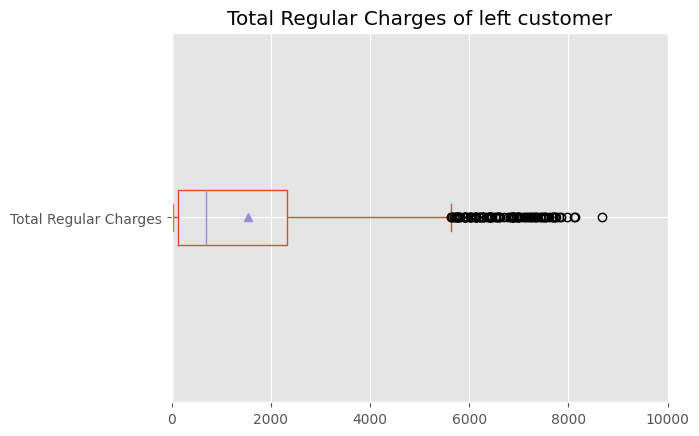

In [402]:
# box plot: chart showing the descriptive statistics values group 1
plt.figure()
df_group_1.plot.box(column = tested_column, showmeans = True,vert = False)
plt.xlim(0, 10000)
plt.title('Total Regular Charges of left customer')
plt.show()

<Figure size 640x480 with 0 Axes>

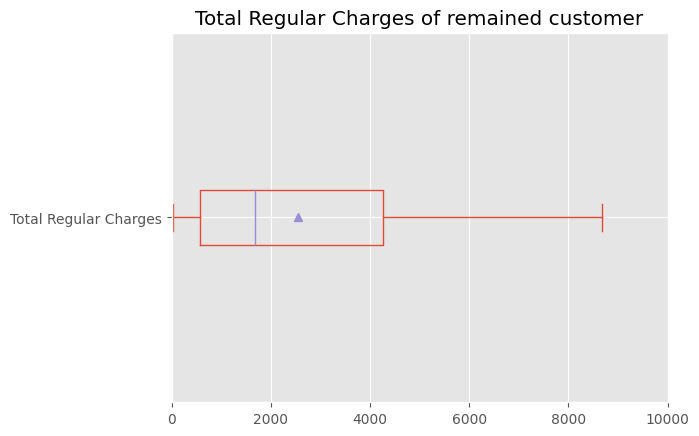

In [403]:
# box plot: chart showing the descriptive statistics values group 1
plt.figure()
df_group_2.plot.box(column = tested_column, showmeans = True,vert = False)
plt.xlim(0, 10000)
plt.title('Total Regular Charges of remained customer')
plt.show()

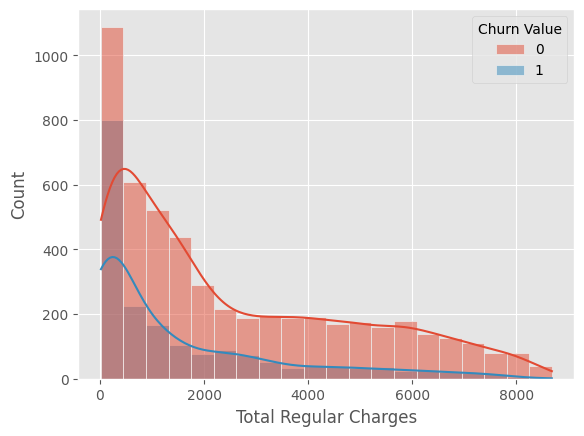

In [384]:
# histogram: frequency of data
plt.figure()
sns.histplot(data = df, bins = 20, x = tested_column, 
    hue = group_by_column, kde = True)
plt.show()

In [385]:
#Skew ans Kurtosis

In [386]:
# define function for conditionally coloring p value
def pcol(p):
    p = round(p, 4)
    if p >= 0.05:
        return colored(f'p = {p}', 'green')
    else:
        return colored(f'p = {p}', 'red')

In [387]:
# calculate the skewness
skew_group_1 = skew(df_group_1[tested_column])
skew_group_2 = skew(df_group_2[tested_column])

print(f'Skew group_1: {skew_group_1}')
print(f'Skew group_2: {skew_group_2}')

Skew group_1: 1.509701716231094
Skew group_2: 0.8083296997591193


In [388]:
# calculate the kurtosis (Fisher's)
kurtosis_group_1 = kurtosis(df_group_1[tested_column])
kurtosis_group_2 = kurtosis(df_group_2[tested_column])

print(f'Kurtosis group_1: {kurtosis_group_1}')
print(f'Kurtosis group_2: {kurtosis_group_2}')

Kurtosis group_1: 1.4545874870369122
Kurtosis group_2: -0.5494180275601095


In [389]:
#Hypothesis testing

In [390]:
# Normality test
## null hypothesis: distribution of the sample is NOT significantly DIFFERENT from a normal distribution

In [391]:
# Shapiro-Wilk normality test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = shapiro(df_group_1[tested_column])
print(f'group_1: p= {result.pvalue}')

group_1: p= 1.0746521684792384e-44


In [392]:
# Shapiro-Wilk normality test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = shapiro(df_group_2[tested_column])
print(f'group_2: p= {result.pvalue}')

group_2: p= 1.6085148539568666e-52


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5174.
  res = hypotest_fun_out(*samples, **kwds)


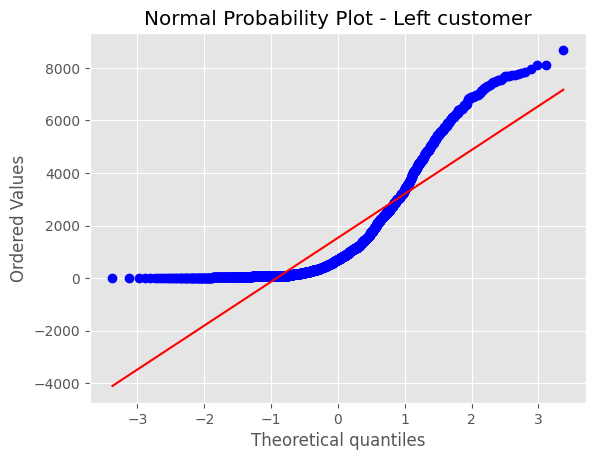

In [405]:
# visualize a probability Q-Q plot
probplot(df_group_1[tested_column], dist = 'norm', plot = plt)
plt.title('Normal Probability Plot - Left customer')
plt.show()

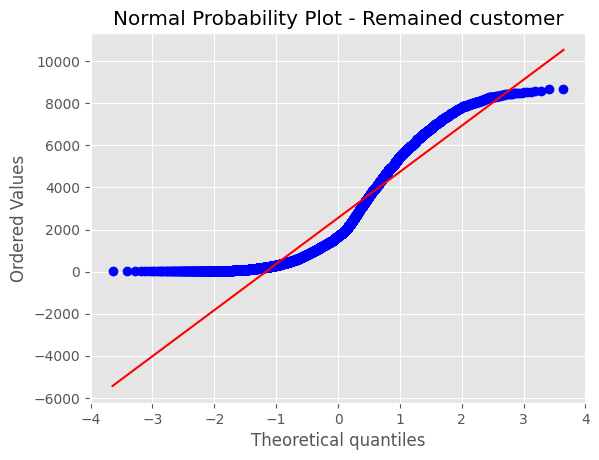

In [404]:
# visualize a probability Q-Q plot
probplot(df_group_2[tested_column], dist = 'norm', plot = plt)
plt.title('Normal Probability Plot - Remained customer')
plt.show()

In [395]:
# Levene's test:
## null hypothesis: there is NO significant DIFFERENCE in Variances of the sample groups

In [396]:
# Levene's test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = levene(df_group_1[tested_column], df_group_2[tested_column])
print(f'group_1 vs group_2: p = {result.pvalue}')

group_1 vs group_2: p = 1.6664214314642235e-37


In [397]:
# Student's t-test (2 independent samples):
## null hypothesis: there is NO significant DIFFERENCE in the Means of 2 sample groups

In [398]:
# Student's t-test (2 independent samples)
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = ttest_ind(df_group_1[tested_column], df_group_2[tested_column])
print(f'group_1 vs group_2: p ={result.pvalue}')

group_1 vs group_2: p =1.5388989901779986e-63


In [399]:
#Final section

In [400]:
# beep sound
frequency = 840  # Hz
duration = 1000  # milliseconds

winsound.Beep(frequency, duration)

In [401]:
print('Statistical analysis has been made!')

Statistical analysis has been made!
